<a href="https://colab.research.google.com/github/imharshmishra87/Feature-Scaling-Ml/blob/main/outlier_detection(z_score).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/placement.csv")

In [ ]:
df.sample(5)

,cgpa,placement_exam_marks,placed
812,5.99,23.0,0
161,6.26,52.0,1
783,6.23,24.0,1
299,6.75,15.0,1
876,6.33,20.0,0


/tmp/ipython-input-383246650.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],ax=ax1)
/tmp/ipython-input-383246650.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],ax=ax2)


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

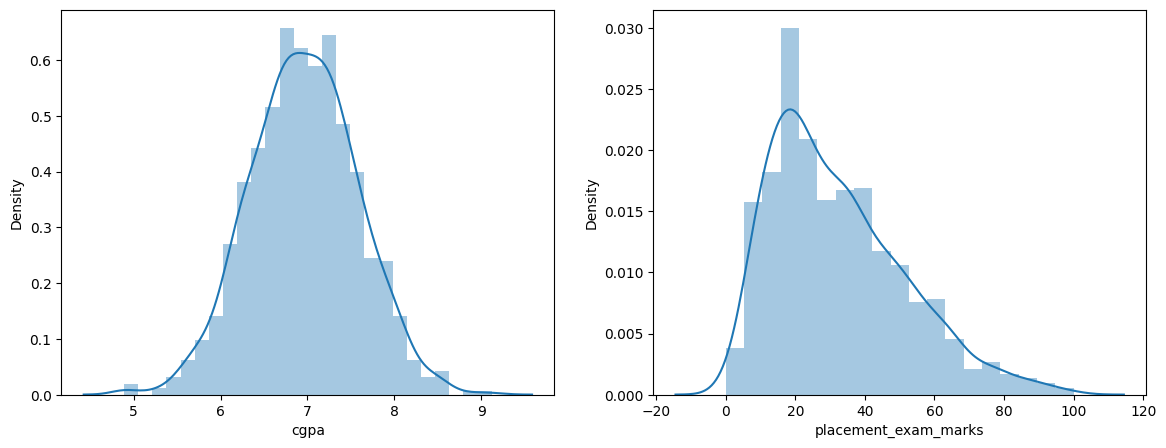

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(14,5))
sns.distplot(df['cgpa'],ax=ax1)
sns.distplot(df['placement_exam_marks'],ax=ax2)

In [ ]:
print("The mean of CGPA is : {}".format(df['cgpa'].mean()))
print("The Standard Deviation of CGPA is : {}".format(df['cgpa'].std()))
print("The max value of CGPA is : {}".format(df['cgpa'].max()))
print("The min value of CGPA is : {}".format(df['cgpa'].min()))

The mean of CGPA is : 6.96124
The Standard Deviation of CGPA is : 0.6158978751323894
The max value of CGPA is : 9.12
The min value of CGPA is : 4.89


In [ ]:
upperlimit=(df['cgpa'].mean()+3*df['cgpa'].std())
lowerlimit=(df['cgpa'].mean()-3*df['cgpa'].std())


# Detecting The Outliers

In [ ]:
df[(df['cgpa']>upperlimit) | (df['cgpa']<lowerlimit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [ ]:
new_df=df[(df['cgpa']<upperlimit)&(df['cgpa']>lowerlimit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Z-score Calculation

In [ ]:
df['Z_score_cgpa']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,Z_score_cgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [ ]:
new_z_df=df[(df['Z_score_cgpa']<3) & (df['Z_score_cgpa']>-3)]
new_z_df

,cgpa,placement_exam_marks,placed,Z_score_cgpa
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [ ]:
ul=(df['cgpa'].mean()+3*df['cgpa'].std())
ll=(df['cgpa'].mean()-3*df['cgpa'].std())
ul
ll

np.float64(5.123433428579941)

In [ ]:
df['cgpa']=np.where(df['cgpa']>ul,ul,np.where(df['cgpa']<ll,ll, df['cgpa']))

In [ ]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
